# Pymaceuticals Inc.
---

### Analysis

- Infubinol is the only drug that had an outlier, all other drugs had results between 25&75 percentiles.
- There was a steady increase in the tumor size as the weight of the mice increased.  I interpret that as the drug was not as effective for heavier mice.
- For mouse I509, the Capomulin drug regimen would increase the size of the tumor, before decreasing in size, then gain again, before another drop in tumor size.  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
#ms_group = mouse_study.groupby("Mouse ID")

# Display the data table for preview
mouse_study_reordered = mouse_study[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                                "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
mouse_study_reordered["Tumor Volume (mm3)"] = mouse_study_reordered["Tumor Volume (mm3)"].astype(float).round (1)


In [2]:
# Checking the number of mice.
mice_count = mouse_study_reordered["Mouse ID"].unique().size
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_dup = mouse_study_reordered[mouse_study_reordered.duplicated(subset=['Mouse ID', 'Timepoint'])]
#mouse_clean = pd.concat([mouse_metadata,study_results], ignore_index=False)
mousestudy_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.0,0,Propriva,Female,21,26
911,g989,5,47.6,0,Propriva,Female,21,26
913,g989,10,49.9,0,Propriva,Female,21,26
915,g989,15,53.4,0,Propriva,Female,21,26
917,g989,20,54.7,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup = mouse_study_reordered.loc[mouse_study_reordered["Mouse ID"] == "g989", :]
mice_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.0,0,Propriva,Female,21,26
909,g989,0,45.0,0,Propriva,Female,21,26
910,g989,5,48.8,0,Propriva,Female,21,26
911,g989,5,47.6,0,Propriva,Female,21,26
912,g989,10,51.7,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study_reordered[mouse_study_reordered["Mouse ID"] !="g989"]
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,k403,5,38.8,0,Ramicane,Male,21,16
2,k403,10,35.0,1,Ramicane,Male,21,16
3,k403,15,34.2,1,Ramicane,Male,21,16
4,k403,20,33.0,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.1,2,Naftisol,Male,9,30
1889,z969,30,65.8,3,Naftisol,Male,9,30
1890,z969,35,69.2,4,Naftisol,Male,9,30
1891,z969,40,70.3,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = mouse_clean["Mouse ID"].unique().size
mouse_clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summarytable = mouse_clean.groupby("Drug Regimen")
mice_mean = summarytable["Tumor Volume (mm3)"].mean()
mice_median = summarytable["Tumor Volume (mm3)"].median()
mice_var = summarytable["Tumor Volume (mm3)"].var()
mice_std = summarytable["Tumor Volume (mm3)"].std()
mice_sem = summarytable["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
statistic_summary = pd.DataFrame({ "Mean Tumor Volume": mice_mean,
                            "Median Tumor Volume": mice_median,
                            "Tumor Volume Variance": mice_var,
                            "Tumor Volume Standard Deviation": mice_std,
                            "Tumor Volume Standard Error": mice_sem })
statistic_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggmethod = mouse_clean[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"]).style.set_caption("Summary Stastics")
aggmethod

## Bar and Pie Charts

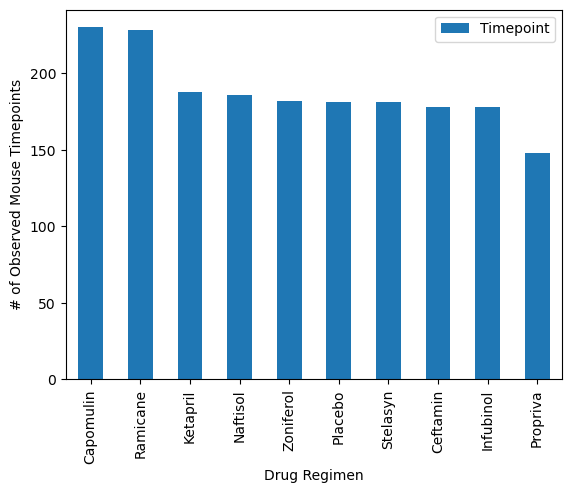

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_tp = mouse_clean[["Timepoint", "Drug Regimen"]].groupby(["Drug Regimen"]).count()
tp_sorted = total_tp.sort_values(["Timepoint"], ascending=False)

timepoint_plot = tp_sorted.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

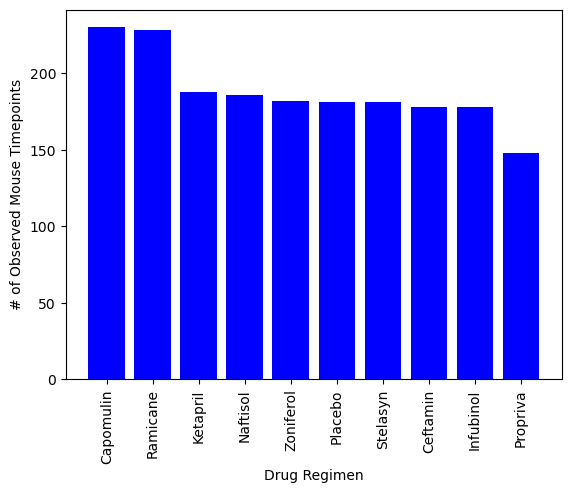

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(tp_sorted.index, tp_sorted['Timepoint'], color='b', alpha=1, align='center')
plt.ylabel('# of Observed Mouse Timepoints') 
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

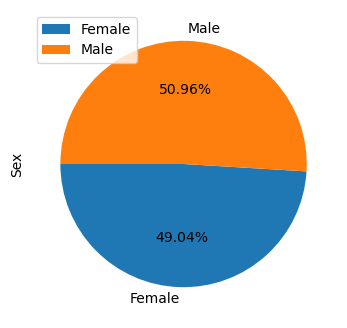

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_clean.groupby(["Sex"]).count()
gender_plot = gender.plot.pie(startangle=180, y = "Mouse ID", title= "", autopct= "%1.2f%%", figsize=(4, 4))

# Set legend location, remove label
#gender_plot.legend(loc="lower center")
gender_plot.set_ylabel("Sex")
plt.show()

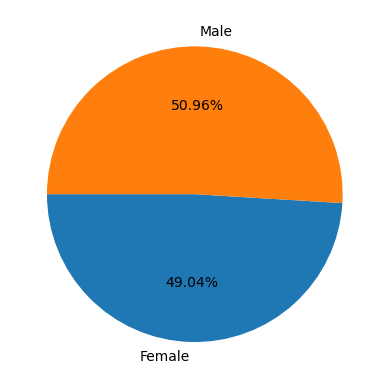

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_clean.groupby(["Sex"])["Sex"].count()
plt.pie(gender, startangle=180, autopct='%1.2f%%', labels=('Female', 'Male'))

# add title, headings and legend
plt.title("")
#plt.legend(labels=('Female', 'Male'), loc='lower center')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = mouse_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_merge = pd.merge(greatest_tp, mouse_clean, on=("Mouse ID", "Timepoint"))
greatest_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,68.0,2,Infubinol,Female,20,23
1,a251,45,65.5,1,Infubinol,Female,21,25
2,a262,45,70.7,4,Placebo,Female,17,29
3,a275,45,63.0,3,Ceftamin,Female,20,28
4,a366,30,63.4,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in greatest_merge.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        capomulin_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_data.append(row['Tumor Volume (mm3)'])
    
    # add subset 
treatments_df = pd.DataFrame({treatments[0]: capomulin_data,
                       treatments[1]: ramicane_data,
                       treatments[2]: infubinol_data,
                       treatments[3]: ceftamin_data
                       })
treatments_df.head()    
    # Determine outliers using upper and lower bounds
# Capomulin
cap_q1 = np.percentile(capomulin_data, 25, interpolation = 'midpoint')
cap_q2 = np.percentile(capomulin_data, 50, interpolation = 'midpoint') 
cap_q3 = np.percentile(capomulin_data, 75, interpolation = 'midpoint') 
cap_iqr = cap_q3 - cap_q1
cap_low = cap_q1 - (1.5 * cap_iqr)
cap_up = cap_q3 + (1.5 * cap_iqr)

# Ramicane
ram_q1 = np.percentile(ramicane_data, 25, interpolation = 'midpoint')
ram_q2 = np.percentile(ramicane_data, 50, interpolation = 'midpoint') 
ram_q3 = np.percentile(ramicane_data, 75, interpolation = 'midpoint') 
ram_iqr = ram_q3 - ram_q1
ram_iqr = ram_q3 - ram_q1
ram_low = ram_q1 - (1.5 * ram_iqr)
ram_up = ram_q3 + (1.5 * ram_iqr)

# Infubinol
inf_q1 = np.percentile(infubinol_data, 25, interpolation = 'midpoint')
inf_q2 = np.percentile(infubinol_data, 50, interpolation = 'midpoint') 
inf_q3 = np.percentile(infubinol_data, 75, interpolation = 'midpoint') 
inf_iqr = inf_q3 - inf_q1 
inf_iqr = inf_q3 - inf_q1
inf_low = inf_q1 - (1.5 * inf_iqr)
inf_up = inf_q3 + (1.5 * inf_iqr)

# Ceftamin
cef_q1 = np.percentile(ceftamin_data, 25, interpolation = 'midpoint') 
cef_q2 = np.percentile(ceftamin_data, 50, interpolation = 'midpoint')
cef_q3 = np.percentile(ceftamin_data, 75, interpolation = 'midpoint') 
cef_iqr = cef_q3 - cef_q1 
cef_iqr = cef_q3 - cef_q1
cef_low = cef_q1 - (1.5 * cef_iqr)
cef_up = cef_q3 + (1.5 * cef_iqr)
    
# Determine outliers using upper and lower bounds
outlier_cap =[]
outlier_ram = []
outlier_inf = []
outlier_cef = []

for x in capomulin_data:
    if ((x> cap_up) or (x<cap_low)):
         outlier_cap.append(x)
            
for x in ramicane_data:
    if ((x > ram_up) or (x < ram_low)):
         outlier_ram.append(x)
            
for x in infubinol_data:
    if ((x > inf_up) or (x < inf_low)):
         outlier_inf.append(x)
            
for x in ceftamin_data:
    if ((x > cef_up) or (x < cef_low)):
         outlier_cef.append(x)
print('Capomulins potential outliers:', outlier_cap)
print('Ramicane''s potential outliers:', outlier_ram)
print('Infubinol''s potential outliers:', outlier_inf)
print('Ceftamin''s potential outliers:', outlier_cef)

Capomulins potential outliers: []
Ramicanes potential outliers: []
Infubinols potential outliers: [36.3]
Ceftamins potential outliers: []


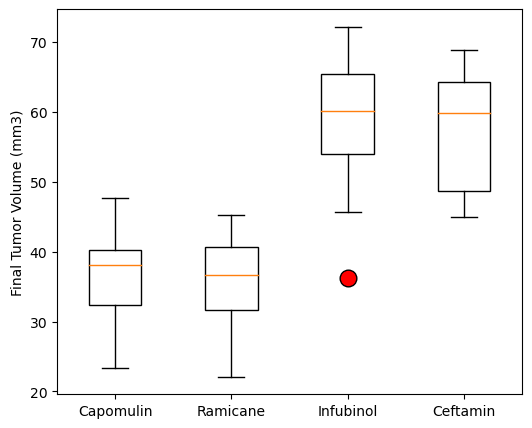

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outliers = dict(marker='o', markerfacecolor='red', markersize=12)

# Lists to plot
plot_list = [treatments_df[treatments[0]],
                treatments_df[treatments[1]],
                treatments_df[treatments[2]],
                treatments_df[treatments[3]]]

# Plot output and styling
fig1, ax = plt.subplots(figsize=(6,5)) 
ax.set_ylabel('Final Tumor Volume (mm3)') 
ax.boxplot(plot_list, patch_artist=True, boxprops=dict(facecolor='white'), showmeans=False, flierprops=outliers)
plt.xticks([1,2,3,4], treatments)

plt.show()

## Line and Scatter Plots

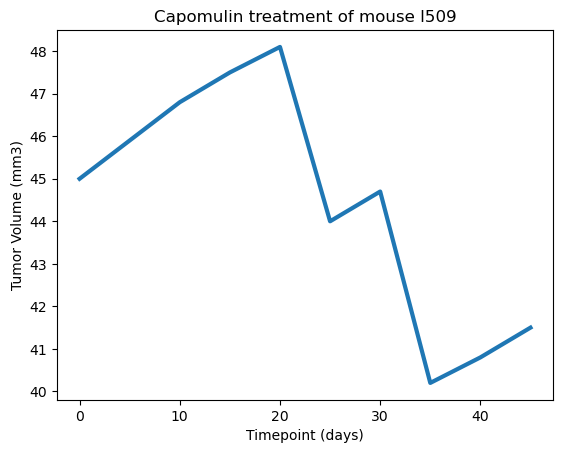

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_clean.loc[mouse_clean["Mouse ID"] == "l509",:]

# set plot axis data
x_mouse = mouse_l509["Timepoint"]
y_mouse = mouse_l509["Tumor Volume (mm3)"]

# Plot output and styling
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_mouse, y_mouse, linewidth=3) 
plt.show()

In [26]:
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,k403,5,38.8,0,Ramicane,Male,21,16
2,k403,10,35.0,1,Ramicane,Male,21,16
3,k403,15,34.2,1,Ramicane,Male,21,16
4,k403,20,33.0,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.1,2,Naftisol,Male,9,30
1889,z969,30,65.8,3,Naftisol,Male,9,30
1890,z969,35,69.2,4,Naftisol,Male,9,30
1891,z969,40,70.3,4,Naftisol,Male,9,30


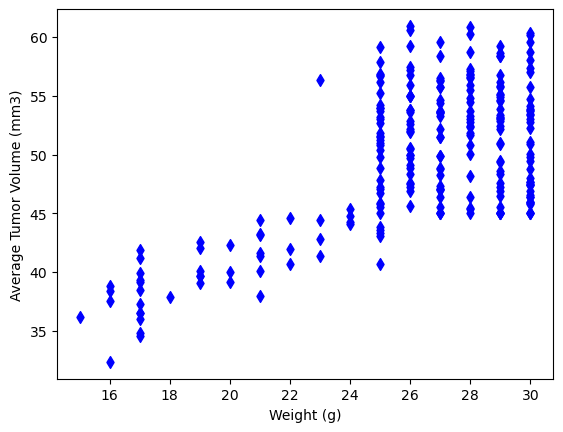

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

campoulin_df = mouse_clean.groupby(["Mouse ID"])
#regimen_capomulin = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin",:]
average_weight = campoulin_df["Weight (g)"].mean()
average_volume = campoulin_df["Tumor Volume (mm3)"].mean()

# Plot output and styling
plt.scatter(average_weight, average_volume, marker="d", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

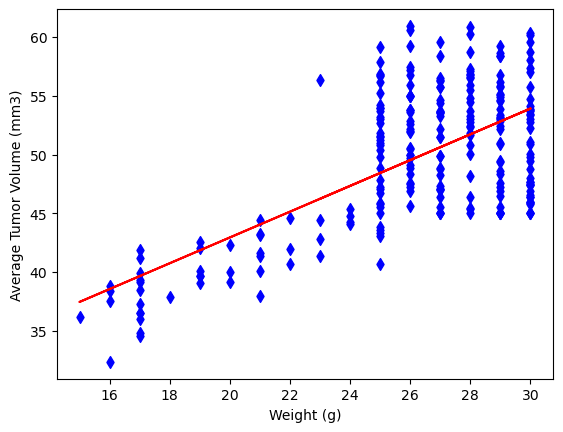

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient}")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(average_weight,average_volume)

co_plot = average_weight * slope + intercept
# Plot line reg
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot main data
plt.scatter(average_weight, average_volume, marker="d", facecolors="blue")
plt.plot(average_weight, co_plot, color="red")

# Plot output and styling
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()